In [1]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
base = pd.read_json('../datasets/_authors_paper.json')
len(base)

2495

In [3]:
base['date_create']=base['date_create'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [4]:
# base = base[base['date_create'] < '2009-01-01']
# len(base)

In [5]:
base.head()

,author_idauthor,date_create,idauthor_paper,paper_idpaper
0,aoz45xyz12,2007-03-30,auz35ppr2,704.0002
1,aoz26xyz17,2007-03-30,auz70ppr11,704.0002
2,aoz55xyz4,2007-03-30,auz40ppr10,704.0002
3,aoz21xyz6,2007-03-30,auz25ppr19,704.0002
4,aoz40xyz14,2007-03-30,auz5ppr20,704.0002


In [6]:
G = nx.Graph()

In [7]:
for _, b in base.iterrows():
    if b['date_create'] <= datetime.datetime.strptime('2009-01-01', "%Y-%m-%d"):
        G.add_edge(b['author_idauthor'], 
                   b['idauthor_paper'],
                   papers=b['paper_idpaper'])

In [8]:
pos = nx.spring_layout(G)

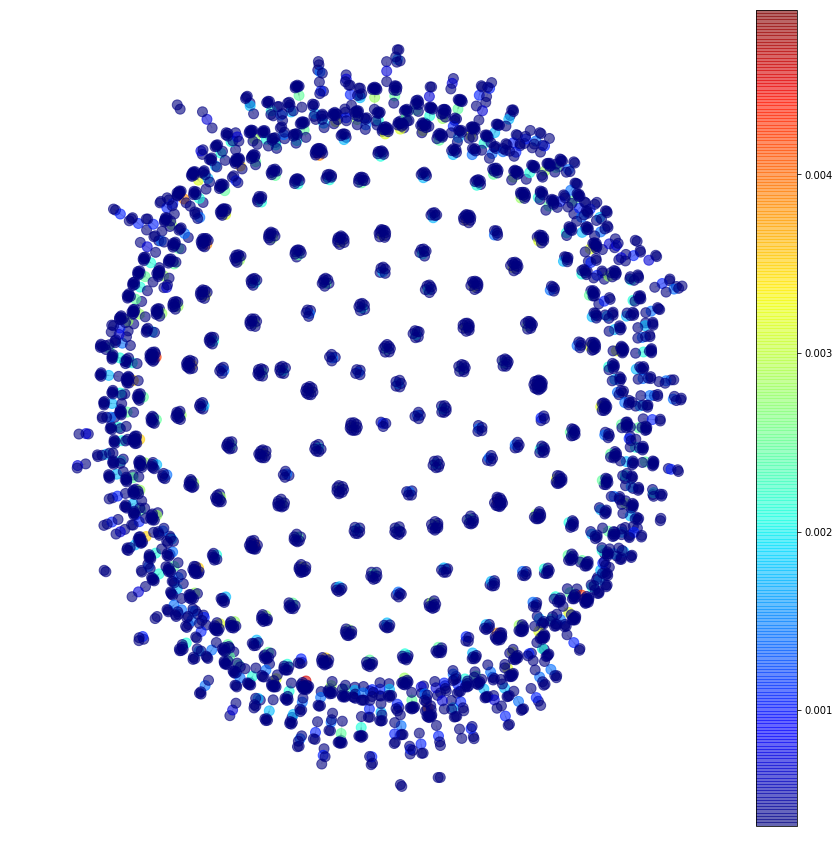

In [9]:
node_color = [cent for cent in nx.degree_centrality(G).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G).values())), 
                            vmax=max(list(nx.degree_centrality(G).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [10]:
length = nx.all_pairs_shortest_path_length(G)

In [11]:
distancias = [x for x in length]

In [12]:
authors_dist_2 = []
for a in distancias:
    principal = a[0]
    coautores = a[1]
    for co,va in coautores.items():
        if va == 2:
            authors_dist_2.append([principal, co])
print(authors_dist_2[:10])

[['aoz45xyz12', 'aoz85xyz21'], ['aoz45xyz12', 'aoz27xyz3'], ['aoz45xyz12', 'aoz17xyz12'], ['aoz45xyz12', 'aoz89xyz21'], ['aoz45xyz12', 'aoz73xyz8'], ['aoz45xyz12', 'aoz67xyz20'], ['aoz45xyz12', 'aoz73xyz9'], ['aoz45xyz12', 'aoz84xyz11'], ['aoz26xyz17', 'aoz107xyz18'], ['aoz26xyz17', 'aoz33xyz24']]


In [13]:
G_futuro = nx.Graph()

In [14]:
for _, b in base.iterrows():
    if b['date_create'] > datetime.datetime.strptime('2007-12-31', "%Y-%m-%d"):
        G_futuro.add_edge(b['author_idauthor'], 
                           b['idauthor_paper'],
                           papers=b['paper_idpaper'])

In [15]:
list(G_futuro.nodes())[:5]

['aoz59xyz8', 'auz5ppr7', 'aoz112xyz13', 'auz70ppr15', 'aoz20xyz31']

In [16]:
pos = nx.spring_layout(G_futuro)

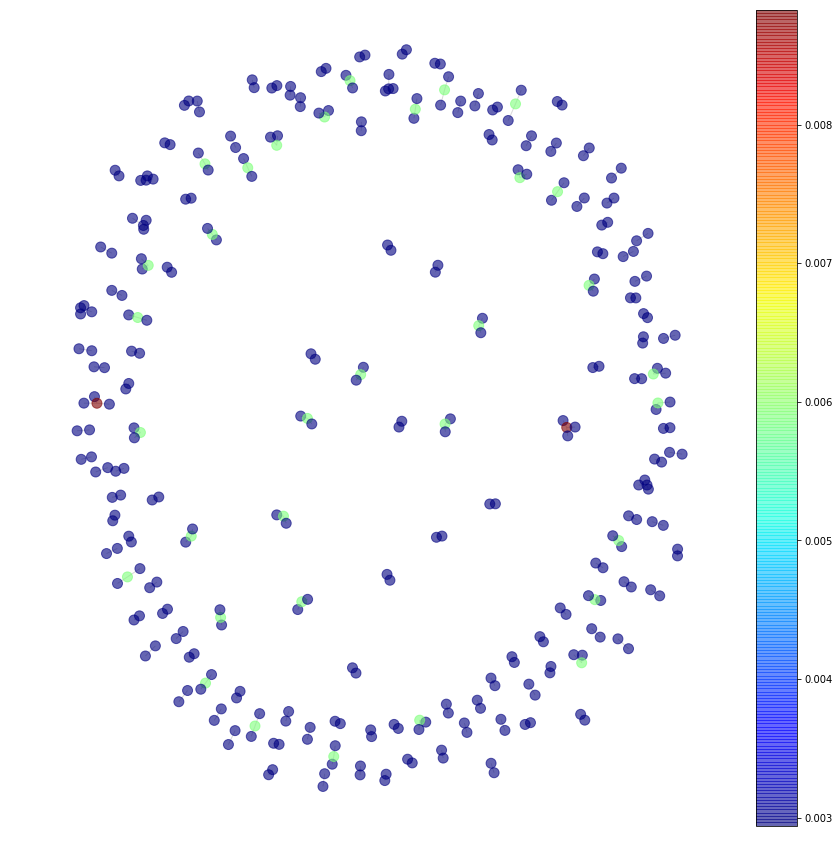

In [17]:
node_color = [cent for cent in nx.degree_centrality(G_futuro).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G_futuro, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G_futuro, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G_futuro).values())), 
                            vmax=max(list(nx.degree_centrality(G_futuro).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [18]:
authors_dist_2[0:5]

[['aoz45xyz12', 'aoz85xyz21'],
 ['aoz45xyz12', 'aoz27xyz3'],
 ['aoz45xyz12', 'aoz17xyz12'],
 ['aoz45xyz12', 'aoz89xyz21'],
 ['aoz45xyz12', 'aoz73xyz8']]

In [19]:
ligacoes_futuras = pd.DataFrame(authors_dist_2, columns=['Author_1', 'Author_2'])

In [20]:
ligacoes_futuras.head()

,Author_1,Author_2
0,aoz45xyz12,aoz85xyz21
1,aoz45xyz12,aoz27xyz3
2,aoz45xyz12,aoz17xyz12
3,aoz45xyz12,aoz89xyz21
4,aoz45xyz12,aoz73xyz8


In [21]:
ligacoes_futuras['label'] = ligacoes_futuras.apply(
    lambda lig: G_futuro.has_edge(lig['Author_1'], lig['Author_2']), axis=1)

In [22]:
coefs = nx.jaccard_coefficient(G, authors_dist_2)


In [23]:
for u, v, p in coefs:
    print((u, v, p))

('aoz45xyz12', 'aoz85xyz21', 1.0)
('aoz45xyz12', 'aoz27xyz3', 1.0)
('aoz45xyz12', 'aoz17xyz12', 1.0)
('aoz45xyz12', 'aoz89xyz21', 1.0)
('aoz45xyz12', 'aoz73xyz8', 1.0)
('aoz45xyz12', 'aoz67xyz20', 1.0)
('aoz45xyz12', 'aoz73xyz9', 1.0)
('aoz45xyz12', 'aoz84xyz11', 1.0)
('aoz26xyz17', 'aoz107xyz18', 1.0)
('aoz26xyz17', 'aoz33xyz24', 1.0)
('aoz26xyz17', 'aoz21xyz17', 1.0)
('aoz26xyz17', 'aoz17xyz14', 1.0)
('aoz26xyz17', 'aoz53xyz24', 1.0)
('aoz26xyz17', 'aoz47xyz17', 1.0)
('aoz26xyz17', 'aoz29xyz22', 1.0)
('aoz26xyz17', 'aoz42xyz18', 1.0)
('aoz55xyz4', 'aoz60xyz6', 1.0)
('aoz55xyz4', 'aoz29xyz25', 1.0)
('aoz21xyz6', 'aoz20xyz10', 1.0)
('aoz21xyz6', 'aoz81xyz9', 1.0)
('aoz21xyz6', 'aoz31xyz18', 1.0)
('aoz21xyz6', 'aoz8xyz17', 1.0)
('aoz21xyz6', 'aoz98xyz6', 1.0)
('aoz21xyz6', 'aoz23xyz15', 1.0)
('aoz21xyz6', 'aoz34xyz25', 1.0)
('aoz40xyz14', 'aoz73xyz18', 1.0)
('aoz40xyz14', 'aoz101xyz9', 1.0)
('aoz26xyz3', 'aoz88xyz13', 1.0)
('aoz26xyz3', 'aoz104xyz23', 1.0)
('aoz13xyz18', 'aoz90xyz5', 1.

('aoz31xyz26', 'aoz16xyz8', 1.0)
('aoz31xyz26', 'aoz72xyz6', 1.0)
('aoz31xyz26', 'aoz109xyz13', 1.0)
('aoz63xyz20', 'aoz66xyz16', 1.0)
('aoz63xyz20', 'aoz17xyz13', 1.0)
('aoz63xyz20', 'aoz26xyz21', 1.0)
('aoz63xyz20', 'aoz5xyz9', 1.0)
('aoz63xyz20', 'aoz18xyz20', 1.0)
('aoz63xyz20', 'aoz45xyz26', 1.0)
('aoz13xyz14', 'aoz30xyz13', 1.0)
('aoz13xyz14', 'aoz26xyz10', 1.0)
('aoz13xyz14', 'aoz50xyz10', 1.0)
('aoz13xyz14', 'aoz90xyz2', 1.0)
('aoz13xyz14', 'aoz77xyz14', 1.0)
('aoz13xyz14', 'aoz80xyz20', 1.0)
('aoz13xyz14', 'aoz75xyz5', 1.0)
('aoz13xyz14', 'aoz73xyz21', 1.0)
('aoz13xyz14', 'aoz63xyz15', 1.0)
('aoz13xyz14', 'aoz79xyz17', 1.0)
('aoz13xyz14', 'aoz83xyz5', 1.0)
('aoz52xyz4', 'aoz37xyz14', 1.0)
('aoz52xyz4', 'aoz72xyz23', 1.0)
('aoz52xyz4', 'aoz72xyz12', 1.0)
('aoz52xyz4', 'aoz98xyz12', 1.0)
('aoz52xyz4', 'aoz88xyz4', 1.0)
('aoz52xyz4', 'aoz58xyz16', 1.0)
('aoz100xyz21', 'aoz102xyz13', 1.0)
('aoz100xyz21', 'aoz101xyz14', 1.0)
('aoz100xyz21', 'aoz106xyz4', 1.0)
('aoz100xyz21', 'aoz62

('aoz5xyz14', 'aoz31xyz20', 1.0)
('aoz5xyz14', 'aoz46xyz19', 1.0)
('aoz5xyz14', 'aoz31xyz4', 1.0)
('aoz5xyz14', 'aoz23xyz19', 1.0)
('aoz5xyz14', 'aoz25xyz7', 1.0)
('aoz106xyz15', 'aoz60xyz21', 1.0)
('aoz106xyz15', 'aoz46xyz17', 1.0)
('aoz106xyz15', 'aoz22xyz8', 1.0)
('aoz106xyz15', 'aoz65xyz4', 1.0)
('aoz106xyz15', 'aoz67xyz19', 1.0)
('aoz106xyz15', 'aoz95xyz18', 1.0)
('aoz91xyz16', 'aoz90xyz4', 1.0)
('aoz91xyz16', 'aoz52xyz22', 1.0)
('aoz91xyz16', 'aoz49xyz20', 1.0)
('aoz91xyz16', 'aoz18xyz23', 1.0)
('aoz65xyz15', 'aoz51xyz17', 1.0)
('aoz65xyz15', 'aoz69xyz24', 1.0)
('aoz65xyz15', 'aoz31xyz22', 1.0)
('aoz65xyz15', 'aoz100xyz14', 1.0)
('aoz65xyz15', 'aoz8xyz16', 1.0)
('aoz65xyz15', 'aoz104xyz24', 1.0)
('aoz65xyz15', 'aoz18xyz29', 1.0)
('aoz85xyz18', 'aoz40xyz6', 1.0)
('aoz85xyz18', 'aoz44xyz7', 1.0)
('aoz85xyz18', 'aoz77xyz20', 1.0)
('aoz85xyz18', 'aoz57xyz4', 1.0)
('aoz85xyz18', 'aoz24xyz17', 1.0)
('aoz85xyz18', 'aoz53xyz27', 1.0)
('aoz52xyz5', 'aoz41xyz6', 1.0)
('aoz52xyz5', 'aoz16xy

('aoz90xyz20', 'aoz54xyz13', 1.0)
('aoz90xyz20', 'aoz45xyz24', 1.0)
('aoz60xyz22', 'aoz91xyz21', 1.0)
('aoz60xyz22', 'aoz72xyz4', 1.0)
('aoz60xyz22', 'aoz68xyz7', 1.0)
('aoz60xyz22', 'aoz56xyz7', 1.0)
('aoz34xyz24', 'aoz41xyz21', 1.0)
('aoz34xyz24', 'aoz60xyz13', 1.0)
('aoz34xyz24', 'aoz56xyz17', 1.0)
('aoz34xyz24', 'aoz60xyz10', 1.0)
('aoz34xyz24', 'aoz63xyz23', 1.0)
('aoz34xyz24', 'aoz54xyz15', 1.0)
('aoz34xyz24', 'aoz93xyz13', 1.0)
('aoz34xyz24', 'aoz21xyz14', 1.0)
('aoz34xyz24', 'aoz57xyz14', 1.0)
('aoz34xyz24', 'aoz8xyz18', 1.0)
('aoz99xyz7', 'aoz33xyz20', 1.0)
('aoz99xyz7', 'aoz105xyz19', 1.0)
('aoz99xyz7', 'aoz40xyz19', 1.0)
('aoz99xyz7', 'aoz65xyz9', 1.0)
('aoz99xyz7', 'aoz69xyz6', 1.0)
('aoz99xyz7', 'aoz110xyz15', 1.0)
('aoz99xyz7', 'aoz18xyz26', 1.0)
('aoz99xyz7', 'aoz89xyz25', 1.0)
('aoz40xyz21', 'aoz26xyz19', 1.0)
('aoz40xyz21', 'aoz32xyz25', 1.0)
('aoz40xyz21', 'aoz94xyz23', 1.0)
('aoz40xyz21', 'aoz106xyz25', 1.0)
('aoz40xyz21', 'aoz109xyz19', 1.0)
('aoz35xyz11', 'aoz51xyz

('aoz55xyz15', 'aoz27xyz4', 1.0)
('aoz55xyz15', 'aoz82xyz25', 1.0)
('aoz55xyz15', 'aoz93xyz23', 1.0)
('aoz44xyz7', 'aoz85xyz18', 1.0)
('aoz44xyz7', 'aoz40xyz6', 1.0)
('aoz44xyz7', 'aoz77xyz20', 1.0)
('aoz44xyz7', 'aoz57xyz4', 1.0)
('aoz44xyz7', 'aoz24xyz17', 1.0)
('aoz44xyz7', 'aoz53xyz27', 1.0)
('aoz20xyz17', 'aoz101xyz7', 1.0)
('aoz20xyz17', 'aoz26xyz16', 1.0)
('aoz20xyz17', 'aoz36xyz20', 1.0)
('aoz20xyz17', 'aoz36xyz10', 1.0)
('aoz20xyz17', 'aoz74xyz20', 1.0)
('aoz20xyz17', 'aoz57xyz15', 1.0)
('aoz20xyz17', 'aoz49xyz24', 1.0)
('aoz40xyz17', 'aoz93xyz21', 1.0)
('aoz40xyz17', 'aoz85xyz14', 1.0)
('aoz40xyz17', 'aoz55xyz22', 1.0)
('aoz91xyz20', 'aoz66xyz24', 1.0)
('aoz58xyz13', 'aoz50xyz11', 1.0)
('aoz58xyz13', 'aoz27xyz6', 1.0)
('aoz58xyz13', 'aoz20xyz26', 1.0)
('aoz58xyz13', 'aoz12xyz23', 1.0)
('aoz58xyz13', 'aoz93xyz19', 1.0)
('aoz58xyz13', 'aoz105xyz22', 1.0)
('aoz42xyz13', 'aoz106xyz9', 1.0)
('aoz42xyz13', 'aoz71xyz23', 1.0)
('aoz42xyz13', 'aoz41xyz48', 1.0)
('aoz42xyz13', 'aoz108x

('aoz6xyz17', 'aoz41xyz15', 1.0)
('aoz6xyz17', 'aoz38xyz20', 1.0)
('aoz6xyz17', 'aoz85xyz24', 1.0)
('aoz106xyz4', 'aoz100xyz21', 1.0)
('aoz106xyz4', 'aoz102xyz13', 1.0)
('aoz106xyz4', 'aoz101xyz14', 1.0)
('aoz106xyz4', 'aoz62xyz3', 1.0)
('aoz106xyz4', 'aoz100xyz30', 1.0)
('aoz51xyz3', 'aoz61xyz13', 1.0)
('aoz51xyz3', 'aoz60xyz17', 1.0)
('aoz51xyz3', 'aoz89xyz27', 1.0)
('aoz51xyz3', 'aoz69xyz16', 1.0)
('aoz51xyz3', 'aoz73xyz23', 1.0)
('aoz51xyz3', 'aoz117xyz17', 1.0)
('aoz27xyz23', 'aoz40xyz9', 1.0)
('aoz27xyz23', 'aoz16xyz7', 1.0)
('aoz27xyz23', 'aoz51xyz11', 1.0)
('aoz27xyz23', 'aoz43xyz20', 1.0)
('aoz27xyz23', 'aoz64xyz18', 1.0)
('aoz27xyz23', 'aoz108xyz19', 1.0)
('aoz27xyz23', 'aoz8xyz5', 1.0)
('aoz43xyz17', 'aoz46xyz23', 1.0)
('aoz43xyz17', 'aoz77xyz9', 1.0)
('aoz43xyz17', 'aoz50xyz6', 1.0)
('aoz43xyz17', 'aoz101xyz27', 1.0)
('aoz43xyz17', 'aoz22xyz3', 1.0)
('aoz43xyz17', 'aoz111xyz23', 1.0)
('aoz43xyz17', 'aoz99xyz22', 1.0)
('aoz38xyz16', 'aoz91xyz13', 1.0)
('aoz38xyz16', 'aoz5xyz

('aoz27xyz13', 'aoz53xyz4', 1.0)
('aoz36xyz4', 'aoz46xyz7', 1.0)
('aoz36xyz4', 'aoz80xyz15', 1.0)
('aoz36xyz4', 'aoz88xyz9', 1.0)
('aoz36xyz4', 'aoz33xyz16', 1.0)
('aoz36xyz4', 'aoz37xyz16', 1.0)
('aoz36xyz4', 'aoz103xyz15', 1.0)
('aoz15xyz26', 'aoz85xyz16', 1.0)
('aoz15xyz26', 'aoz5xyz12', 1.0)
('aoz15xyz26', 'aoz61xyz11', 1.0)
('aoz15xyz26', 'aoz75xyz15', 1.0)
('aoz98xyz14', 'aoz85xyz3', 1.0)
('aoz98xyz14', 'aoz73xyz6', 1.0)
('aoz98xyz14', 'aoz99xyz19', 1.0)
('aoz98xyz14', 'aoz102xyz21', 1.0)
('aoz98xyz14', 'aoz13xyz6', 1.0)
('aoz98xyz14', 'aoz131xyz29', 1.0)
('aoz65xyz18', 'aoz106xyz16', 1.0)
('aoz65xyz18', 'aoz72xyz8', 1.0)
('aoz65xyz18', 'aoz78xyz15', 1.0)
('aoz65xyz18', 'aoz82xyz14', 1.0)
('aoz65xyz18', 'aoz9xyz14', 1.0)
('aoz65xyz18', 'aoz89xyz9', 1.0)
('aoz77xyz16', 'aoz99xyz23', 1.0)
('aoz77xyz16', 'aoz98xyz20', 1.0)
('aoz24xyz10', 'aoz66xyz4', 1.0)
('aoz24xyz10', 'aoz57xyz9', 1.0)
('aoz24xyz10', 'aoz109xyz9', 1.0)
('aoz11xyz11', 'aoz60xyz19', 1.0)
('aoz11xyz11', 'aoz24xyz5', 

('aoz28xyz15', 'aoz89xyz54', 1.0)
('aoz98xyz21', 'aoz42xyz7', 1.0)
('aoz98xyz21', 'aoz15xyz7', 1.0)
('aoz98xyz21', 'aoz67xyz22', 1.0)
('aoz39xyz16', 'aoz6xyz5', 1.0)
('aoz39xyz16', 'aoz56xyz11', 1.0)
('aoz39xyz16', 'aoz83xyz11', 1.0)
('aoz39xyz16', 'aoz66xyz34', 1.0)
('aoz39xyz16', 'aoz16xyz27', 1.0)
('aoz12xyz24', 'aoz86xyz6', 1.0)
('aoz12xyz24', 'aoz81xyz13', 1.0)
('aoz12xyz24', 'aoz51xyz6', 1.0)
('aoz12xyz24', 'aoz70xyz1', 1.0)
('aoz12xyz24', 'aoz12xyz14', 1.0)
('aoz12xyz24', 'aoz38xyz9', 1.0)
('aoz32xyz25', 'aoz26xyz19', 1.0)
('aoz32xyz25', 'aoz40xyz21', 1.0)
('aoz32xyz25', 'aoz94xyz23', 1.0)
('aoz32xyz25', 'aoz106xyz25', 1.0)
('aoz32xyz25', 'aoz109xyz19', 1.0)
('aoz68xyz5', 'aoz103xyz23', 1.0)
('aoz68xyz5', 'aoz106xyz20', 1.0)
('aoz44xyz23', 'aoz34xyz10', 1.0)
('aoz44xyz23', 'aoz84xyz21', 1.0)
('aoz44xyz23', 'aoz23xyz21', 1.0)
('aoz44xyz23', 'aoz24xyz12', 1.0)
('aoz14xyz24', 'aoz102xyz20', 1.0)
('aoz14xyz24', 'aoz42xyz16', 1.0)
('aoz14xyz24', 'aoz79xyz13', 1.0)
('aoz14xyz24', 'aoz

('aoz95xyz24', 'aoz23xyz11', 1.0)
('aoz95xyz24', 'aoz80xyz19', 1.0)
('aoz95xyz24', 'aoz84xyz12', 1.0)
('aoz104xyz7', 'aoz88xyz14', 1.0)
('aoz104xyz7', 'aoz104xyz21', 1.0)
('aoz39xyz15', 'aoz68xyz23', 1.0)
('aoz39xyz15', 'aoz16xyz4', 1.0)
('aoz39xyz15', 'aoz54xyz23', 1.0)
('aoz39xyz15', 'aoz87xyz26', 1.0)
('aoz110xyz6', 'aoz95xyz17', 1.0)
('aoz110xyz6', 'aoz16xyz20', 1.0)
('aoz110xyz6', 'aoz36xyz11', 1.0)
('aoz110xyz6', 'aoz31xyz21', 1.0)
('aoz110xyz6', 'aoz61xyz16', 1.0)
('aoz110xyz6', 'aoz104xyz20', 1.0)
('aoz110xyz6', 'aoz96xyz18', 1.0)
('aoz110xyz6', 'aoz33xyz15', 1.0)
('aoz64xyz7', 'aoz35xyz12', 1.0)
('aoz64xyz7', 'aoz105xyz1', 1.0)
('aoz64xyz7', 'aoz67xyz6', 1.0)
('aoz29xyz21', 'aoz7xyz18', 1.0)
('aoz29xyz21', 'aoz36xyz17', 1.0)
('aoz29xyz21', 'aoz37xyz11', 1.0)
('aoz29xyz21', 'aoz28xyz31', 1.0)
('aoz44xyz9', 'aoz82xyz19', 1.0)
('aoz44xyz9', 'aoz10xyz15', 1.0)
('aoz73xyz20', 'aoz33xyz9', 1.0)
('aoz73xyz20', 'aoz53xyz23', 1.0)
('aoz73xyz20', 'aoz62xyz13', 1.0)
('aoz110xyz18', 'aoz3